In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model

In [6]:
df = pd.read_excel('./17-red_neuronal/twitters.xlsx')
df

,cuenta,partido,timestamp,tweet
0,a34133350b0605cb24081843f63176ca,psoe,13639734920,@vesteve3 @manubenas @ccoo_rm @desobediencia_ ...
1,a34133350b0605cb24081843f63176ca,psoe,13640610350,"“@kirovast: @Hugo_Moran muy fan de la ""radical..."
2,a34133350b0605cb24081843f63176ca,psoe,13641168040,@ALTAS_PRESIONES Nuevos dueños para las renova...
3,a34133350b0605cb24081843f63176ca,psoe,13641209670,@jumanjisolar @solartradex @josea_dolera El di...
4,a34133350b0605cb24081843f63176ca,psoe,13641526920,“@cesarnayu: https://t.co/J4OTXj1x7w … Por fav...
...,...,...,...,...
245785,2a5fcd1034beb5bd30bf5a1528008d81,psoe,16795715260,Un placer inaugurar la jornada #NextGeneration...
245786,561b1a4d4369a0116ac5eba469f28bc0,psoe,16795715340,Y esto también es el PP https://t.co/CaOTdTWnXB
245787,42acd1f0c1c51732519ad0d533573359,pp,16795717300,Actualización: Los 3 violadores ya han sido pu...
245788,747c68ab573c6e4ad8f417f71614e022,pp,16795718410,Con la firma del Convenio de colaboración entr...


In [7]:
# convierte la variable en categorías
df['partido'].astype("category").cat.codes

0         3
1         3
2         3
3         3
4         3
         ..
245785    3
245786    3
245787    2
245788    2
245789    2
Length: 245790, dtype: int8

In [8]:
df['targets'] = df['partido'].astype("category").cat.codes
df

,cuenta,partido,timestamp,tweet,targets
0,a34133350b0605cb24081843f63176ca,psoe,13639734920,@vesteve3 @manubenas @ccoo_rm @desobediencia_ ...,3
1,a34133350b0605cb24081843f63176ca,psoe,13640610350,"“@kirovast: @Hugo_Moran muy fan de la ""radical...",3
2,a34133350b0605cb24081843f63176ca,psoe,13641168040,@ALTAS_PRESIONES Nuevos dueños para las renova...,3
3,a34133350b0605cb24081843f63176ca,psoe,13641209670,@jumanjisolar @solartradex @josea_dolera El di...,3
4,a34133350b0605cb24081843f63176ca,psoe,13641526920,“@cesarnayu: https://t.co/J4OTXj1x7w … Por fav...,3
...,...,...,...,...,...
245785,2a5fcd1034beb5bd30bf5a1528008d81,psoe,16795715260,Un placer inaugurar la jornada #NextGeneration...,3
245786,561b1a4d4369a0116ac5eba469f28bc0,psoe,16795715340,Y esto también es el PP https://t.co/CaOTdTWnXB,3
245787,42acd1f0c1c51732519ad0d533573359,pp,16795717300,Actualización: Los 3 violadores ya han sido pu...,2
245788,747c68ab573c6e4ad8f417f71614e022,pp,16795718410,Con la firma del Convenio de colaboración entr...,2


In [9]:
# Dividir los datos en conjuntos de entrenamiento y prueba
df_train, df_test = train_test_split(df, test_size=0.3)

In [21]:
# Vectorizar el texto de los twitts
tfidf = TfidfVectorizer(max_features=5000)
Xtrain = tfidf.fit_transform(df_train['tweet'])
Xtest = tfidf.transform(df_test['tweet'])

In [22]:
# Definir los objetivos de entrenamiento y prueba
Ytrain = df_train['targets']
Ytest = df_test['targets']

In [23]:
# Número de clases
K = df['targets'].max() + 1
print(K)

5


In [24]:
# Dimensiones
D = Xtrain.shape[1]
print(D)

5000


In [25]:
# construcción del modelo
i = Input(shape=(D,))
x = Dense(300, activation='relu')(i)
x = Dense(K)(x)  # softmax

In [26]:
model = Model(i, x)

In [27]:
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 5000)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 300)            │     1,500,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 5)              │         1,505 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,501,805 (5.73 MB)

 Trainable params: 1,501,805 (5.73 MB)

 Non-trainable params: 0 (0.00 B)

<img src="./17-red_neuronal/NVIDIA_Share_jwxk2m5XsD.png" style="width:700px;hight:auto"></img>

In [28]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer='adam',
    metrics=['accuracy']
)

In [29]:
Xtrain = Xtrain.toarray()
Xtest = Xtest.toarray()

In [30]:
r = model.fit(
    Xtrain, Ytrain,
    validation_data=(Xtest, Ytest),
    epochs=100,
    batch_size=12,
)

Epoch 1/100
14338/14338 ━━━━━━━━━━━━━━━━━━━━ 135s 9ms/step - accuracy: 0.6378 - loss: 0.9278 - val_accuracy: 0.7065 - val_loss: 0.7563
Epoch 2/100
14338/14338 ━━━━━━━━━━━━━━━━━━━━ 143s 10ms/step - accuracy: 0.7480 - loss: 0.6559 - val_accuracy: 0.7135 - val_loss: 0.7435
Epoch 3/100
14338/14338 ━━━━━━━━━━━━━━━━━━━━ 138s 10ms/step - accuracy: 0.7993 - loss: 0.5375 - val_accuracy: 0.7171 - val_loss: 0.7690
Epoch 4/100
14338/14338 ━━━━━━━━━━━━━━━━━━━━ 129s 9ms/step - accuracy: 0.8609 - loss: 0.3956 - val_accuracy: 0.7155 - val_loss: 0.8438
Epoch 5/100
14338/14338 ━━━━━━━━━━━━━━━━━━━━ 143s 10ms/step - accuracy: 0.9095 - loss: 0.2655 - val_accuracy: 0.7108 - val_loss: 0.9781
Epoch 6/100
14338/14338 ━━━━━━━━━━━━━━━━━━━━ 138s 10ms/step - accuracy: 0.9399 - loss: 0.1746 - val_accuracy: 0.7107 - val_loss: 1.1675
Epoch 7/100
14338/14338 ━━━━━━━━━━━━━━━━━━━━ 143s 10ms/step - accuracy: 0.9533 - loss: 0.1285 - val_accuracy: 0.7095 - val_loss: 1.3706
Epoch 8/100
14338/14338 ━━━━━━━━━━━━━━━━━━━━ 143s 

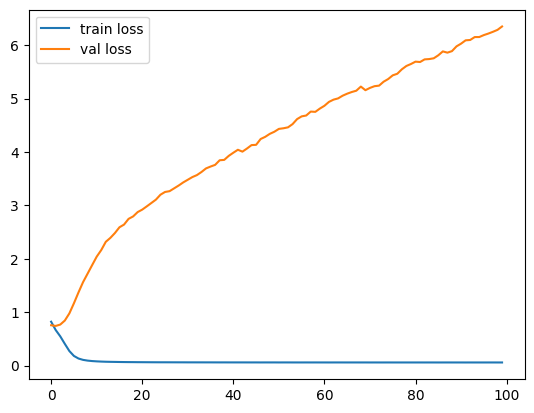

In [31]:
plt. plot(r.history["loss"], label="train loss")
plt.plot(r.history["val_loss"], label="val loss")
plt.legend();

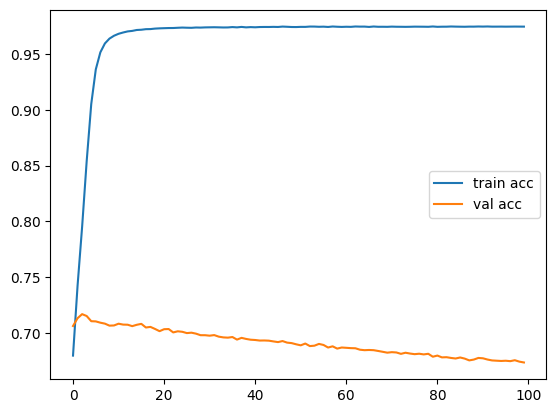

In [32]:
plt. plot(r.history["accuracy"], label="train acc")
plt.plot(r.history["val_accuracy"], label="val acc")
plt.legend();

In [43]:
# Guardar el modelo entrenado en un archivo en formato nativo Keras
model.save('modelo_entrenado_twitt.keras')
# model.save('modelo_entrenado.model')

In [45]:
modelo_cargado = tf.keras.models.load_model('modelo_entrenado_twitt.keras')

In [46]:
# Verificar la arquitectura del modelo cargado
modelo_cargado.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 5000)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 300)            │     1,500,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 5)              │         1,505 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,003,612 (11.46 MB)

 Trainable params: 1,501,805 (5.73 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,501,807 (5.73 MB)

In [47]:
# Evaluar el modelo cargado para asegurarse de que funciona correctamente
resultado = modelo_cargado.evaluate(Xtest, Ytest, batch_size=12)
print(f'Pérdida del modelo cargado: {resultado[0]}')
print(f'Precisión del modelo cargado: {resultado[1]}')

6145/6145 ━━━━━━━━━━━━━━━━━━━━ 5s 819us/step - accuracy: 0.6735 - loss: 6.3740
Pérdida del modelo cargado: 6.351937770843506
Precisión del modelo cargado: 0.6739221811294556


In [48]:
# Opcional: evaluar de nuevo el modelo original para comparación
resultado_original = model.evaluate(Xtest, Ytest, batch_size=12)
print(f'Pérdida del modelo original: {resultado_original[0]}')
print(f'Precisión del modelo original: {resultado_original[1]}')

6145/6145 ━━━━━━━━━━━━━━━━━━━━ 6s 912us/step - accuracy: 0.6735 - loss: 6.3740
Pérdida del modelo original: 6.351937770843506
Precisión del modelo original: 0.6739221811294556
